# Machine Learning: Basic Principles

## Model Validation and Selection

## Learning goals

Remember the main components of a machine learning problem: 

1. **data points** which are characterized by features $\mathbf{x} \in \mathcal{X}$ and labels $y\in \mathcal{Y}$, 

2. a **hypothesis space** $\mathcal{H}$ consisting of maps ("predictors") $h: \mathcal{X} \rightarrow \mathcal{Y}$ from features $\mathbf{x}\in\mathcal{X}$ to a predicted label $\hat{y}=h(\mathbf{x})\in \mathcal{Y}$ and 

3. a **loss function** (such as squared error loss or the logistic loss), which measures the quality of a predictor. 

In this exercise you will learn a principled approach for **model selection**, i.e., how to choose the best (in a certain sense) hypothesis space $\mathcal{H}$ out of a whole list of different hypothesis spaces $\mathcal{H}^{(1)},\mathcal{H}^{(2)},\ldots$. The key idea behind this approach is to use different data points for choosing a predictor $\hat{h}^{(d)}$ out of a hypothesis space $\mathcal{H}^{(d)}$ (via empiricial risk minimization) and for assessing (validating) the quality of the predictor $\hat{h}^{(d)} \in \mathcal{H}^{(d)}$. The data points used for choosing (learning) the predictor $\hat{h}^{(d)}$ out of $\mathcal{H}^{(d)}$ is referred to as the **training set** $\mathbb{X}^{(\rm train)}$, while the data points used to assess the quality of $\hat{h}^{(d)}$ is referred to as the **validation set** or **cross-validation set** $\mathbb{X}^{(\rm val)}$.

We will also learn about **regularization** as a "soft" variant of model selection. The basic idea is to regularize the empirical risk minimization problem by adding a term that quantifies the anticipated increase in the validation error (compared to the training error) due to the "complexity" of a particular predictor (e.g., a polynomial of high degree). 

The concept of model selection and regularization is best understood by working through a particular example. To this end, we will (re-)consider the problem of predicting cryptocurrencies (see Round 2 - "Regression").    

### Exercise Content
1. Predicting Cryptocurrencies
2. Model Selection
3. Regularization

### Keywords
 `(Cross-) Validation`, `Model Selection`,`Regularization`,`Training Set`,`Validation Set`,

##  1. Predicting Cryptocurrencies

Let us consider again (see Round 2 "Regression") the problem of predicting the closing price of the cryptocurrency Ethereum based on the closing price of Bitcoin on the same day. However, we will only consider a **subset** of the historic data about Ethereum and Bitcoin used in Round 2 - "Regression". This subset of $N=20$ data points $\mathbb{X} = \{ (x^{(i)},y^{(i)}) \}_{i=1}^{N}$ is stored in the file *BTC_ETH_round4.csv*. 

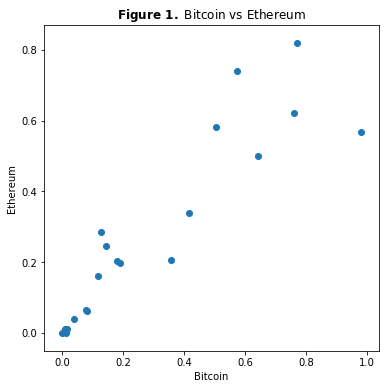

20


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

#Read the data
df=pd.read_csv('BTC_ETH_round4.csv')
x=df.Bitcoin.values #Bitcoin values
y=df.Ethereum.values #Ethereum values

#Reshape the data. 
#This is really important for the matrix multiplications later on!
x=np.reshape(x,(len(x),1))
y=np.reshape(y,(len(y),1))

#Plot the data
plt.figure(figsize=(6, 6))
plt.scatter(x, y) 
plt.title(r'$\bf{Figure\ 1.}$ Bitcoin vs Ethereum')
plt.xlabel('Bitcoin')
plt.ylabel('Ethereum')
plt.show()
print(len(x))

## 2 Model Selection

As observed in Round 2 - "Regression" (see also the course book Sec. 2.1.3), the relation between the Ethereum price $y$ and the Bitcoin price $x$ is highly non-linear. Therefore it is useful to consider a hypothesis space which is constituted by polynomial functions of degree $d$: 

\begin{equation}
\mathcal{H}^{(d)}_{\rm poly} = \{ h^{(\mathbf{w})}(\cdot): \mathbb{R} \rightarrow \mathbb{R}: h^{(\mathbf{w})}(x) = \sum_{r=1}^{d+1} w_{r} x^{r-1} \mbox{, with some } \mathbf{w} =(w_{1},\ldots,w_{d+1})^{T} \in \mathbb{R}^{d+1} \}.
\label{eq6}
\tag{6}
\end{equation}  

As discussed in the course book (Section 3.2 "Polynomial Regression"), polynomial regression is equivalent to combining linear regression with a feature map $\phi: \mathbb{R} \rightarrow \mathbb{R}^{d+1}$. In particular, we transform the features $x$ (Bitcoin closing price) of the data points to the feature vector  

\begin{equation}
\phi(x) = (x^{0},\ldots,x^{d})^{T} \in \mathbb{R}^{d+1}.
\label{eq7}
\tag{7}
\end{equation}

Using this new feature vector $\mathbf{x}=\phi(x)$, we can represent any polynomial map $h \in \mathcal{H}^{(d)}_{\rm poly}$ as 

\begin{equation} 
h^{(\mathbf{w})}(x) = \mathbf{w}^{T} \phi(x) \mbox{ with some weight vector } \mathbf{w} \in \mathbb{R}^{d+1}.
\label{eq8}
\tag{8}
\end{equation}

Consider a particular choice for the maximum polynomial degree $d=2$. We can find a good polynomial predictor $\hat{h}^{(d)}$ by minimizing the empirical risk over some labeled data points. However, we will not use the entire dataset $\mathbb{X}$ from Section 1 for this empirical risk minimization but only a subset, the **training set** 

\begin{equation} 
\mathbb{X}^{(\rm train)} = \{ (x^{(2)},y^{(2)}), (x^{(4)},y^{(4)}), (x^{(6)},y^{(6)}),\ldots,(x^{(N)},y^{(N)}) \}.
\end{equation}

This training set $\mathbb{X}^{(\rm train)}$, of size $N_{\rm train} = N/2$, is obtained by selecting every other data point of the original data set $\mathbb{X}$. The remaining data points in $\mathbb{X}$ will be used as the **validation set**:  

\begin{equation} 
\mathbb{X}^{(\rm val)}= \{(x^{(1)},y^{(1)}),(x^{(3)},y^{(3)}),(x^{(19)},y^{(19)})\}.
\end{equation} 

For each choide of $d$, which corresponds to a particular hypothesis space $\mathcal{H}^{(d)}$, we learn the optimal predcitor $\hat{h}^{(d)}$ by solving 

\begin{align}
\hat{h}^{(d)} & = {\rm arg} \min_{h \in \mathcal{H}^{(d)}_{\rm poly}} (1/N_{\rm train}) \sum_{i=2,4,\ldots,20} \big(y^{(i)} - h(x^{(i)})\big)^2. 
\label{eq9}
\tag{9}
\end{align} 

This optimization problem can be rewritten using the paramtrization \eqref{eq7} as

\begin{align}
\hat{\mathbf{w}}^{(d)} & = {\rm arg} \min_{\mathbf{w} \in \mathbb{R}^{d+1}} (1/N_{\rm train}) \sum_{i=2,4,\ldots,20} \big(y^{(i)} - \mathbf{w}^{T}\phi \big(x^{(i)}\big) \big)^2. 
\label{eq10}
\tag{10}
\end{align}

Given the optimal weight vector $\hat{\mathbf{w}}^{(d)}$ which solves \eqref{eq10}, we obtain the optimal predictor $\hat{h}^{(d)}$ (which solves \eqref{eq9}) by $\hat{h}^{(d)}(x)  = \big( \hat{\mathbf{w}}^{(d)} \big)^{T} \phi(x)$.

The optimization problem \eqref{eq10} can be solved either using a closed-form expression (under certain conditions) involving the feature matrix $\mathbf{X}=\big(\phi\big(x^{(2)}\big),\phi\big(x^{(4)}\big),\ldots,\phi\big(x^{(20)}\big)\big)^{T} \in \mathbb{R}^{10\times(d+1)}$ or using gradient descent (with a sufficiently small step size). The minimum objective value in \eqref{eq9} and \eqref{eq10}, obtained for degree $d$ is the **training error**

\begin{equation} 
E_{\rm train}^{(d)}= (1/N_{\rm train}) \sum_{i=2,4,\ldots,20} \big(y^{(i)} - \big( \hat{\mathbf{w}}^{(d)} \big)^{T}\phi\big(x^{(i)}\big) \big)^2.
\end{equation} 

After determining the predictors $\hat{h}^{(d)}$, one predictor for each choice of the maximum degree $d$, we evaluate the empirical risk incurred by $\hat{h}^{(d)}$ over the validation set (the **validation error**):

\begin{equation}
E_{\rm val}^{(d)} = (1/N_{\rm val}) \sum_{i=1,3,\ldots,19} \big(y^{(i)} - \big( \hat{\mathbf{w}}^{(d)} \big)^{T}\phi\big(x^{(i)}\big) \big)^2.
\end{equation}

We then choose the degree $d$ for which the validation error $E_{\rm val}^{(d)}$ is smallest. 

It is important to note that we do not use the training error $E_{\rm train}^{(d)}$ for choosing the degree $d$. In general it is not a good idea to choose the hypothesis space based on how small the training error is. This is because for very large hypothesis spaces, like polynomials with a large degree, we can always find a predictor in it which **by accident** is able to fit the training data $\mathbb{X}^{(\rm train)}$ well. However, such a predictor will perform poorly when applied to other data points, such as the data points in the validation set $\mathbb{X}^{(\rm val)}$. 




- The Python function `trainValErrors(x_train,y_train,x_val,y_val,degrees)` below takes as input the training data, validation data and a list of degrees. It returns 3 vectors which contain the resulting optimal weight *w_opts*, the training error, *training_errors* and the validation error, *validation_errors* for each of the degree values.
- We can reuse many functions used for Polynomial Regression in Round 2.
- Note that the optimal weights are obtained only using the training data
- After optimal weight vector has been found, we compute the empirical risk separately for the training data and validation data yielding the training error and the validation error 

,d,E_train,E_val
0,1,0.047725,0.085636
1,2,0.005044,0.018037
2,3,0.003882,0.013717
3,4,0.003613,0.021369
4,5,0.003581,0.013433
5,6,0.002970,1.346183


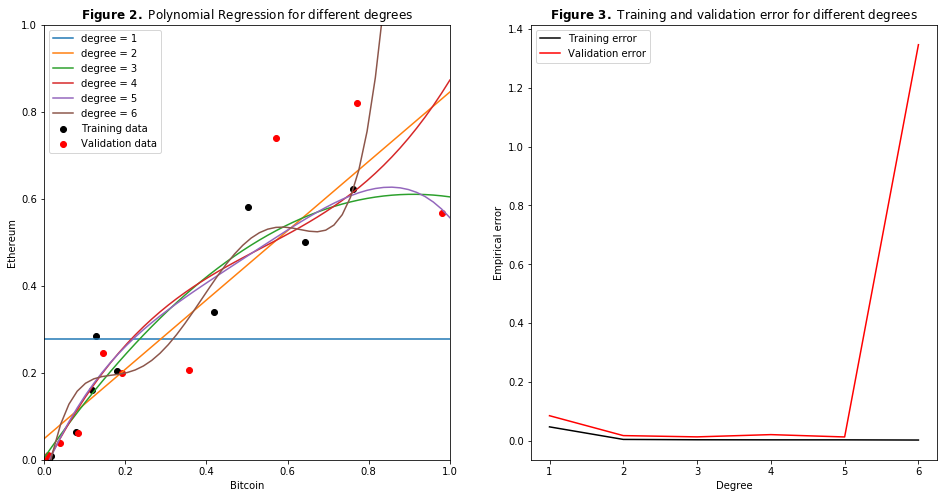

In [3]:
def fit(x, y):
    #Calculate the optimal weight vector
    w_opt = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(x), x)),np.transpose(x)), y)
    return w_opt

def feature_mapping(x, degree):
    #compute the feature map for the given degree
    polynomial_features = np.column_stack([x**d for d in range(0,degree)])
    return polynomial_features

def polynomialRegression(x, y, degree):
    X = feature_mapping(x,degree)
    w_opt=fit(X,y)
    return w_opt

def predict(X, w_opt):
    #predict the labels
    y_pred = np.dot(X,w_opt)
    return y_pred

def empirical_risk(X, y, w_opt):
    empirical_error = np.mean(np.power(np.subtract(np.dot(X,w_opt), y),2))
    return empirical_error
                   

#Split the data into a training and validation set. 
#Don't change this.
x_train=x[1::2]
x_val=x[0::2]
y_train=y[1::2]
y_val=y[0::2]

#the degrees we want to loop over
degrees=[1,2,3,4,5,6]

def trainValErrors(x_train,y_train,x_val,y_val,degrees):
    #compute the optimal weight, training and validation error for each degree in degrees
    w_opts = []
    training_errors=[]
    validation_errors=[]
    for d in degrees:
        w_opt=polynomialRegression(x_train, y_train, d)
        w_opts.append(w_opt)
        training_errors.append(empirical_risk(feature_mapping(x_train,d),y_train,w_opt))
        validation_errors.append(empirical_risk(feature_mapping(x_val,d),y_val,w_opt))
    return w_opts, training_errors,validation_errors

#compute the training and validation errors and display them
w_opts, training_errors, validation_errors = trainValErrors(x_train,y_train,x_val,y_val,degrees)
df_degrees=pd.DataFrame(data={'d':degrees,'E_train':training_errors,'E_val':validation_errors})
display(df_degrees)

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(121)


plt.scatter(x_train, y_train, color='black', label='Training data')
plt.scatter(x_val,y_val,color='red',label='Validation data')
for i in range(len(degrees)):
    plt.plot(np.linspace(0, 1, 50), predict(feature_mapping(np.linspace(0, 1, 50),degrees[i]),w_opts[i]), label='degree = %d' %degrees[i]) 
    
plt.title(r'$\bf{Figure\ 2.}$ Polynomial Regression for different degrees')
plt.xlabel('Bitcoin')
plt.ylabel('Ethereum')
plt.ylim(0,1)
plt.xlim(0,1)
plt.legend()

#plot the training and validation errors for the different degrees
ax = fig.add_subplot(122)
plt.plot(degrees,training_errors,color='black',label='Training error')
plt.plot(degrees,validation_errors,color='red',label='Validation error')

plt.title(r'$\bf{Figure\ 3.}$ Training and validation error for different degrees')
plt.ylabel('Empirical error')
plt.xlabel('Degree')
plt.xticks(degrees)
plt.legend()

plt.show()

##  3 Regularization

In Section 2, we have tried to find the best hypothesis space within a sequence of increasing spaces $\mathcal{H}^{(1)} \subseteq \mathcal{H}^{(2)} \subseteq \ldots \subseteq \mathcal{H}^{(d_{\rm max})}$. The space hypothesis space $\mathcal{H}^{(d)}$ is constituted by polynomials with maximum degree $d$ (see (6)). Indeed, the space of polynomials with maximum degree $d=1$ is a subset of the space of all polynomials with maximum degree $d=2$. 

The simple (but powerful) idea behind model selection is to use the validation errors obtained for the different hypothesis spaces and picking the one resulting in the smallest validation error. 
An alternative approach to model selection is to use a fixed but large hypothesis space, e..g, $\mathcal{H}^{(d_{\rm max})}$ with large degree $d_{\rm max}$, and to **regularize** the corresponding empirical risk minimization problem (10). The idea of regularization is to add a second term (the regularization term) to the objective function in (10). This second terms takes into account that the validation error might be larger than the training error for a highly complex predictor. 

Note that in polynomial regression, we can parametrize the predictors as $h^{(\mathbf{w})}(x)= \mathbf{w}^{T} \phi(x) = \sum_{l=0}^{d_{\rm max}} w_{l+1} x^{l}$ with some weight vector $\mathbf{w} \in \mathbb{R}^{d+1}$. The entries $w_{l}$ of the weight vector $\mathbf{w}=(w_{1},\ldots,w_{d+1})^{T}$ are the cefficients of the powers $x^{0},x^{1},\ldots,x^{d}$ of the feature $x$ (e.g., the Bitcoin closing price). It is reasonable to measure the complexity of $h^{(\mathbf{w})}$ by the average size of the coeffcients $w_{l}$. Indeed, for many large coefficients $w_{l}$, the polynomial map $h^{(\mathbf{w})}(x)$ tends to be more ''wobbly''. In particular, we will use the squared norm $\| \mathbf{w} \|^{2}_{2} = w_{1}^{2}+\ldots+w_{d+1}^{2}$ of the weight vector for the regularization term to be added in (10). This results in the following **regularized empirical risk minimization problem** 

\begin{equation}
\hat{\mathbf{w}}^{(\lambda)} = {\rm arg} \min\limits_{\mathbf{w} \in \mathbb{R}^{d_{\rm max}+1}} (1/N_{\rm train}) \sum_{i=2,4,\ldots,20} (y^{(i)} - \mathbf{w}^{T} \phi(x^{(i)}))^{2}+\lambda \| \mathbf{w} \|^{2}_{2}.
\label{eq12}
\tag{12}
\end{equation}

The resulting weight vector $\hat{\mathbf{w}}^{(\lambda)}$ is then used to construct a predictor $\hat{h}^{(\lambda)}$ as 

\begin{equation} 
\hat{h}^{(\lambda)}(x) = \big( \hat{\mathbf{w}}^{(\lambda)}\big)^{T} \phi(x).
\label{eq13}
\tag{13}
\end{equation} 

The constant $\lambda \geq 0$ is a tuning parameter and controls the "effective degree" of the resulting predictor $\hat{h}^{(\lambda)}(x)$. Using a large value of $\lambda$ in (12), results in a predictor $\hat{h}^{(\lambda)}(x)$ which resembles a polynomial of small degree (say, $d=2$). In contrast, using a very small value of $\lambda$ in (12), will typically produce a predictor $\hat{h}^{(\lambda)}$ which resembles a high-degree polynomial (with $d \approx d_{\rm max}$). 

In a certain sense, we replace (or approximate) the computation of the validation error of $h^{(\mathbf{w})}$  by adding the regularization term $\lambda \| \mathbf{w} \|^{2}_{2}$ to the training error in (12). Indeed, the component $\lambda \| \mathbf{w} \|^{2}_{2}$ accounts for the anticipated increase in validation error due to the complexity ("wobbliness") of the predictor $h^{(\mathbf{w})}(x)= \mathbf{w}^{T} \phi(x)$. 


Similar to linear regression, we can derive a closed-form solution for the optimal weights in \eqref{eq12} as

\begin{align}
\hat{\mathbf{w}}^{(\lambda)}& = \text{argmin}_{\mathbf{w} \in  \mathbb{R}^{d_{\rm max}+1}} \big[(1/N_{\rm train}) \|\mathbf{y} - \mathbf{X} \mathbf{w} \|^{2}_{2} + \lambda \| \mathbf{w} \|^{2}_{2}\big] \nonumber \\[3mm] 
& = (1/N_{\rm train})( (1/N_{\rm train}) \mathbf{X}^{T} \mathbf{X} + \lambda \mathbf{I})^{-1} \mathbf{X}^{T} \mathbf{y}.
\label{eq14}
\tag{14}
\end{align} 

Here, we used the feature matrix $\mathbf{X} = \big(\phi(x^{(2)}),\phi(x^{(4)}),\ldots,\phi(x^{(20)}) \big)^{T} \in \mathbb{R}^{10 \times (d_{\rm max}+1)}$ and the label vector $\mathbf{y}=\big(y^{(2)},y^{(4)},\ldots,y^{(20)}\big)^{T} \in \mathbb{R}^{10}$. 

It remains to specify the choice of the regularization parameter $\lambda$ in \eqref{eq12}. One option is to try out different values for $\lambda$, compute the weight vector $\hat{\mathbf{w}}^{(\lambda)}$ by solving the problem \eqref{eq12} and evaluate the validation error of the corresponding predictor $h^{(\lambda)}$ (see \eqref{eq13}): 

\begin{equation}
E_{\rm val}^{(\lambda)} = (1/N_{\rm val}) \sum_{i=1,3,\ldots,19} (y^{(i)} - \mathbf{w}^{T} \phi(x^{(i)}))^{2}.
\end{equation} 

We then pick the value for $\lambda$ which results in the smallest validation error $E_{\rm val}^{(\lambda)}$. 



1. The Python function `regularizedFit()` below takes as input $\mathbf{X}$, $\mathbf{y}$ and $\lambda$ and returns the optimal weight vector according to (Eq. \ref{eq14}). 
    * You can look at the numpy functions being used in `fit()` implemented in Section 2. 
    * You can use `np.eye()` to generate an identity matrix
2. The Python function `regularizedPolynomialRegression()` takes as input $\mathbf{x}$,$\mathbf{y}$,$\lambda$ and the degree. It returns the optimal weight vector. 
    * Use `feature_mapping()` from Section 2 to get the feature matrix. 
    * Use `regularizedFit()` to compute the optimal weight vector.
3. The Python function `trainValErrorsRegularization()` takes as inputs the training data, validation data, a list of values for lambdas and the maximum polynomial degree. It returns three vectors which contain, for every value of lambda, the optimal weight *w_opts*, the training error *training_errors* and the validation error *validation_errors*.
4. We can largely reuse `trainValErrors()` from Section 2. The difference is that we now loop over the different lambda values, instead of the different degrees.

,Lambdas,Training errors,Validation errors
0,0.00,0.002970,1.346183
1,0.01,0.006321,0.021683
2,0.00,0.002970,1.346183
3,0.10,0.014078,0.032406
4,0.50,0.033803,0.056465
5,1.00,0.048999,0.076654
6,2.00,0.068277,0.101182
7,5.00,0.092993,0.131519


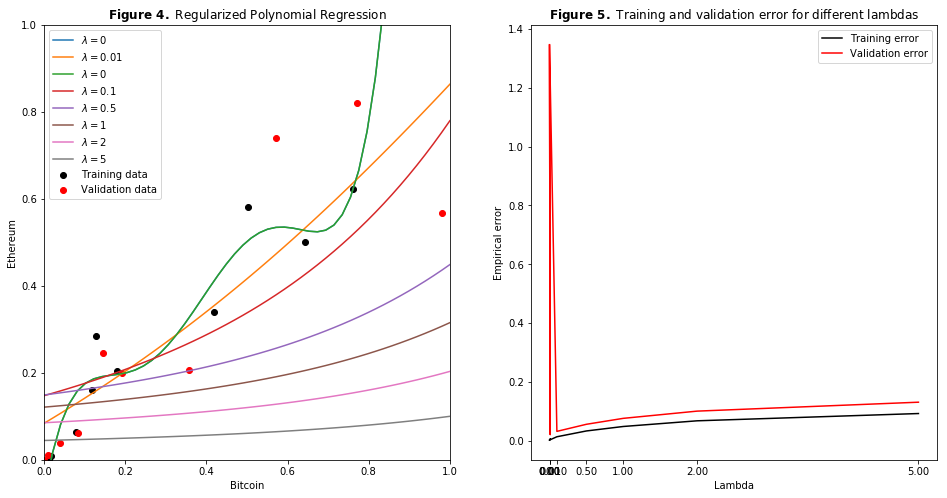

In [4]:
def regularizedFit(X, y,l=0):
    N=X.shape[0]
    w_opt = 1/N*np.dot(np.dot(np.linalg.inv(1/N*np.dot(np.transpose(X), X)+l*np.eye(X.shape[1])),np.transpose(X)), y)
    return w_opt

def regularizedPolynomialRegression(x, y, l=0,degree=2):
    X = feature_mapping(x,degree)
    w_opt=regularizedFit(X,y,l)
    return w_opt

#specify the degree
degree=6
#specify list of values for lambda to be considered
lambdas = [0,0.01,0,0.1,0.5,1,2,5] 
    
def trainValErrorsRegularization(x_train,y_train,x_val,y_val,lambdas=[0],degree=2):
    #compute the optimal weight, training and validation error for each lambda
    w_opts = []
    training_errors=[]
    validation_errors=[]
    for l in lambdas:
        w_opt=regularizedPolynomialRegression(x_train, y_train, l,degree)
        w_opts.append(w_opt)
        training_errors.append(empirical_risk(feature_mapping(x_train,degree),y_train,w_opt))
        validation_errors.append(empirical_risk(feature_mapping(x_val,degree),y_val,w_opt))
    return w_opts, training_errors,validation_errors

#compute the training and validation errors and display them
w_opts_reg, training_errors_reg, validation_errors_reg = trainValErrorsRegularization(x_train,y_train,x_val,y_val,lambdas,degree=degree)
df_lambdas=pd.DataFrame(data={'Lambdas':lambdas,'Training errors':training_errors_reg,'Validation errors':validation_errors_reg})
display(df_lambdas)

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(121)
plt.scatter(x_train, y_train, color='black', label='Training data')
plt.scatter(x_val,y_val,color='red',label='Validation data')

for i in range(len(lambdas)):
    plt.plot(np.linspace(0, 1, 50), predict(feature_mapping(np.linspace(0, 1, 50),degree),w_opts_reg[i]), label='$ \lambda=%s$' %str(lambdas[i])) 
    
plt.title(r'$\bf{Figure\ 4.}$ Regularized Polynomial Regression')
plt.xlabel('Bitcoin')
plt.ylabel('Ethereum')
plt.ylim(0,1)
plt.xlim(0,1)
plt.legend()

#plot the training and validation errors for the different values of lambda
ax=fig.add_subplot(122)
plt.plot(lambdas,training_errors_reg,color='black',label='Training error')
plt.plot(lambdas,validation_errors_reg,color='red',label='Validation error')

plt.title(r'$\bf{Figure\ 5.}$ Training and validation error for different lambdas')
plt.xlabel('Lambda')
plt.ylabel('Empirical error')
plt.xticks(lambdas)
plt.legend()
plt.show()
